# 두 집단 검정

- 독립된 두 집단 간의 비율 차이 검정과 평균 차이 검정에 대해서 알아보자
- 비율 차이 검정은 기술통계량으로 빈도수에 대한 비율에 의미가 있으며, 평균 차이 검정은 표본 평균에 의미가 있다. 

> 두 집단 비율 검정

    두 집단을 대상으로 비율 차이 검정을 통해서 두 집단의 비율이 같은지 또는 다른지를 검정한다.
    분석할 데이터를 대상으로 전처리 과정을 거친 후 비교 대상의 두 집단을 분류하고 비율 차이 검정을 수행한다. 단일 표본 이항 분포 비율 검정은 binom.test() 함수를 이용하지만 독립 표본 이항분포 비율은 검정은 prop.test()함수를 이용한다. 

- 귀무가설 : 두 가지 교육 방법에 따라 교육생의 만족율에 차이가 없다.
- 대립가설 : 차이가 있다. 
- 집단별 subset 작성과 교차 분석
  - 교육 방법에 따라서 두 집단으로 subset을 작성한 후 전처리 과정을 통해서 데이터를 정제한다. 

In [1]:
data = read.csv('two_sample.csv', header=T)
head(data,3)

,no,gender,method,survey,score
,<int>,<int>,<int>,<int>,<dbl>
1,1,1,1,1,5.1
2,2,1,1,0,5.2
3,3,1,1,1,4.7


In [2]:
# 두 집단의 subset 작성 및 데이터 전처리
x = data$method # 교육방법 = 1,2
y = data$survey # 만족도 = 0,1 (불만족,만족)

In [3]:
# 집단별 빈도분석
table(x)
table(y)

x
  1   2 
150 150 

y
  0   1 
 55 245 

In [4]:
# 두 변수에 대한 교차분석
table(x,y, useNA = 'ifany')
# useNA = 'ifany' : 결측치까지 출력

   y
x     0   1
  1  40 110
  2  15 135

- 명목척도의 비율을 바탕으로 prop.test() 함수를 이용하여 두 집단 간 이항분포의 양측 검정을 통해서 검정 통계량을 구한 후 이를 이용하여 가설을 검정한다. 

In [5]:
prop.test(c(110,135),c(150,150),alternative = 'two.sided', conf.level = 0.95)


	2-sample test for equality of proportions with continuity correction

data:  c(110, 135) out of c(150, 150)
X-squared = 12.824, df = 1, p-value = 0.0003422
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.25884941 -0.07448392
sample estimates:
   prop 1    prop 2 
0.7333333 0.9000000 


- p-value 값은 유의수준보다 작기 때문에 두 교육 방법 간의 만족도 차이가 있다고 볼 수 있다.
- 즉, 차이가 없다는 귀무가설을 기각하고 차이가 있다는 연구가설, 대립가설을 채택한다. 

- 이제 첫 번째 교육 방법과 두 번째 교육 방법을 대상으로 방향성을 갖는 연구가설을 검증해보자

In [7]:
prop.test(c(110,135),c(150,150),alternative = 'greater', conf.level = 0.95)
prop.test(c(110,135),c(150,150),alternative = 'less', conf.level = 0.95)


	2-sample test for equality of proportions with continuity correction

data:  c(110, 135) out of c(150, 150)
X-squared = 12.824, df = 1, p-value = 0.9998
alternative hypothesis: greater
95 percent confidence interval:
 -0.2451007  1.0000000
sample estimates:
   prop 1    prop 2 
0.7333333 0.9000000 



	2-sample test for equality of proportions with continuity correction

data:  c(110, 135) out of c(150, 150)
X-squared = 12.824, df = 1, p-value = 0.0001711
alternative hypothesis: less
95 percent confidence interval:
 -1.00000000 -0.08823265
sample estimates:
   prop 1    prop 2 
0.7333333 0.9000000 


- greater는 p-value 값이 0.9998이고(귀무가설 채택) less는 p-value 값이 유의수준보다 작으므로(귀무가설 기각) 두 번째 교육 방법이 만족도가 더 크다고 할 수 있다. 

> 두 집단 평균 검정(독립 표본 T-검정)

    두 집단을 대상으로 평균 차이 검정을 통해서 두 집단의 평균이 같은지 또는 다른지를 검정하는 방법.
    분석할 데이터를 전처리 과정을 거친 후 비교 대상의 두 집단을 분류하고, 평균 차이 검정을 위해서 기술통계량으로 평균을 구한다. 독립 표본평균 검정은 두 집단 간 분산의 동질성 검증(정규분포 검정) 여부를 판정한 후 결과에 따라서 T-검정 또는 웰콕스 검정을 수행한다.
    
    두 검정 방법의 선택은 단일 표본평균 검정과 동일하다.

- 귀무가설 : 교육방법에 따른 두 집단 간 실기시험의 평균차이가 없다. 
- 대립가설 : 차이가 있다.

In [8]:
head(data,3)

,no,gender,method,survey,score
,<int>,<int>,<int>,<int>,<dbl>
1,1,1,1,1,5.1
2,2,1,1,0,5.2
3,3,1,1,1,4.7


In [9]:
summary(data)

       no             gender         method        survey           score      
 Min.   :  1.00   Min.   :1.00   Min.   :1.0   Min.   :0.0000   Min.   :3.000  
 1st Qu.: 75.75   1st Qu.:1.00   1st Qu.:1.0   1st Qu.:1.0000   1st Qu.:5.100  
 Median :150.50   Median :1.00   Median :1.5   Median :1.0000   Median :5.600  
 Mean   :150.50   Mean   :1.42   Mean   :1.5   Mean   :0.8167   Mean   :5.685  
 3rd Qu.:225.25   3rd Qu.:2.00   3rd Qu.:2.0   3rd Qu.:1.0000   3rd Qu.:6.300  
 Max.   :300.00   Max.   :2.00   Max.   :2.0   Max.   :1.0000   Max.   :8.000  
                                                                NA's   :73     

- NA = 73개 존재

In [10]:
# 두 집단의 subset 작성 및 데이터 전처리
result = subset(data, !is.na(score), c(method,score))
head(result,3)

,method,score
,<int>,<dbl>
1,1,5.1
2,1,5.2
3,1,4.7


In [11]:
# 데이터 분리
a = subset(result, method == 1)
b = subset(result, method == 2)
a1 = a$score
b1 = b$score

In [12]:
length(a1)
length(b1)
mean(a1)
mean(b1)

[1] 109

[1] 118

[1] 5.556881

[1] 5.80339

---

- 동질성 검정
  - 모집단에서 추출된 표본을 대상으로 분산의 동질성 검정(정규분포 검정)은 var.test()함수를 이용한다. 
  - 검정결과가 유의수준 0.05보다 큰 경우(귀무가설을 채택한다. 이때, 동직성 검정의 귀무가설은 두 집단 간 분포의 모양이 동질적이다라는 것이다.) 두 집단 간 간 분포의 모양이 동질하다고 할 수 있다.
  - 분산의 동질성 검정
    - 분산의 동질성 검정은 등분산 가정과 등분산 가정되지 않음(이분산)에 따라서 결과가 달라진다. 등분산은 모집단에서 추출된 표본이 균등하게 추출된 것이고, 이분산은 추출된 표본이 특정 계층으로 편중되어 추출되는 경우이다. 

In [13]:
var.test(a1,b1)


	F test to compare two variances

data:  a1 and b1
F = 1.2158, num df = 108, denom df = 117, p-value = 0.3002
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8394729 1.7656728
sample estimates:
ratio of variances 
          1.215768 


- p-value 값이 유의수준보다 크기 때문에 귀무가설을 채택한다. 
- 즉, 두 집단 간의 분포 형태가 동질하다고 볼 수 있다. 

---

- 두 집단 평균 차이 검정
  - 두 집단 간의 동질성 검정에서 분포 형태가 동질하다고 분석되었기 때문에 t.test() 함수(만약 동질하지 않았다면 웰콕스 검정)를 이용하여 두 집단 간 평균 차이 검정을 수행한다. 

In [14]:
# 단계 1 : 양측 검정
t.test(a1,b1,alter = 'two.sided', conf.int = T, conf.level = 0.95)


	Welch Two Sample t-test

data:  a1 and b1
t = -2.0547, df = 218.19, p-value = 0.0411
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.48296687 -0.01005133
sample estimates:
mean of x mean of y 
 5.556881  5.803390 


- 귀무가설 기각, 연구가설 채택
- 즉 차이가 있음을 알 수 있다. 

In [16]:
# 단계 2 : 방향성을 갖는 단측 가설 검정
t.test(a1,b1,alter = 'greater', conf.int = T, conf.level = 0.95)
t.test(a1,b1,alter = 'less', conf.int = T, conf.level = 0.95)


	Welch Two Sample t-test

data:  a1 and b1
t = -2.0547, df = 218.19, p-value = 0.9794
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.4446915        Inf
sample estimates:
mean of x mean of y 
 5.556881  5.803390 



	Welch Two Sample t-test

data:  a1 and b1
t = -2.0547, df = 218.19, p-value = 0.02055
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
        -Inf -0.04832672
sample estimates:
mean of x mean of y 
 5.556881  5.803390 


- b1 집단의 평균이 더 큰 것을 알 수 있다. 

---

- 대응 두 집단 평균 검정(대응 표본 T-검정)
  - 동일한 표본을 대상으로 측정된 두 변수의 평균 차이를 검정하는 분석 방법이다. 
  - 일반적으로 사전검사와 사후검사의 평균 차이를 검증할 때 많이 이용한다. 
  - 예를 들면, 교수법 프로그램을 적용하기 전 학생들의 학습력과 교수법 프로그램 적용 후 학생들의 학습력에 차이가 있는지를 검정한다. 
  - 분석할 데이터를 전처리 과정을 거친 후, 전과 후로 두 집단을 분류하고, 평균 차이 검정을 위해서 기술통계량으로 평균을 구한다. 

- 귀무가설 : 교수법 적용 여부와 관련 없이 학생들의 학습력에는 차이가 없다.
- 대립가설 : 차이가 있다. 

In [19]:
data = read.csv('paired_sample.csv',header=T)
head(data,3)

,no,before,after
,<int>,<dbl>,<dbl>
1,1,5.1,6.3
2,2,5.2,6.3
3,3,4.7,6.5


In [20]:
# 대응 두 집단 subset 생성
result = subset(data, !is.na(after), c(before,after))
x = result$before
y = result$after
head(x,3);head(y,3)

[1] 5.1 5.2 4.7

[1] 6.3 6.3 6.5

In [22]:
# 기술통계량 계산
length(x)
length(y)
# 기술통계량을 계산할 때, 대응표본이면 서로 짝을 이루고 있기 때문에 표본 수가 서로 동일해야 한다. 
mean(x)
mean(y)

[1] 96

[1] 96

[1] 5.16875

[1] 6.220833

- 동질성 검정 
  - 독립 표본의 동질성 검정과 동일하게 var.test() 함수를 이용한다. 
  - 이때 '귀무가설은 차이가 없다'이기 때문에, 유의확률이 유의수준보다 크면 두 집단 간 분포의 몽양이 동질하다고 할 수 있다. 

In [23]:
var.test(x,y,paired=T)


	F test to compare two variances

data:  x and y
F = 1.0718, num df = 95, denom df = 95, p-value = 0.7361
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7151477 1.6062992
sample estimates:
ratio of variances 
          1.071793 


- 귀무가설을 채택한다. 

- 대응 두 집단 평균 차이 검정
  - 대응되는 두 집단 간의 동질성 검정에서 분포 형태가 동질하다고 분석되었다. 
  - 따라서 윌콕스 검정이 아닌 T-검정을 통해 대응 두 집단 간 평균 차이 검정을 수행한다. 

In [24]:
# 단계 1 : 양측 검정
t.test(x,y,paired = T, alter = 'two.sided', conf.int=T, conf.level = 0.95)


	Paired t-test

data:  x and y
t = -13.642, df = 95, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.205184 -0.898983
sample estimates:
mean of the differences 
              -1.052083 


- 귀무가설 기각
- 차이가 있음을 알 수 있다. 

In [26]:
# 단계 2 : 방향성을 갖는 단측 가설 검정
t.test(x,y,paired = T, alter = 'greater', conf.int=T, conf.level = 0.95)
t.test(x,y,paired = T, alter = 'less', conf.int=T, conf.level = 0.95)


	Paired t-test

data:  x and y
t = -13.642, df = 95, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.180182       Inf
sample estimates:
mean of the differences 
              -1.052083 



	Paired t-test

data:  x and y
t = -13.642, df = 95, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.9239849
sample estimates:
mean of the differences 
              -1.052083 


- y집단의 평균이 더 큰 것을 알 수 있다. 

---

- 세 집단 검정
  - 독립된 세 집단 이상의 집단 간 비율 차이 검정과 평균 차이 검정에 대해 알아보자

- 세 집단 비율 검정

In [28]:
data = read.csv('three_sample.csv',header=T)
head(data,4)

,no,method,survey,score
,<int>,<int>,<int>,<dbl>
1,1,1,1,3.2
2,2,2,0,NA
3,3,3,1,4.7
4,4,1,0,NA


In [29]:
# 세집단 subset 작성, 데이터 전처리
method = data$method
survey = data$survey

In [31]:
# 기술통계량(빈도수)
table(method,useNA = 'ifany')

method
 1  2  3 
50 50 50 

In [32]:
table(method,survey, useNA = 'ifany')

      survey
method  0  1
     1 16 34
     2 13 37
     3 11 39

- 세 집단 비율 차이 검정
  - 명목척도의 비율을 바탕으로 prop.test() 함수를 이용하여 세 집단 간 이항분포의 양측 검정을 통해서 검정 통계량을 구한 후 이를 이용하여 가설을 검정한다. 

In [33]:
prop.test(c(34,37,39),c(50,50,50))


	3-sample test for equality of proportions without continuity
	correction

data:  c(34, 37, 39) out of c(50, 50, 50)
X-squared = 1.2955, df = 2, p-value = 0.5232
alternative hypothesis: two.sided
sample estimates:
prop 1 prop 2 prop 3 
  0.68   0.74   0.78 


- 귀무가설을 채택한다. 
- 즉, 세 가지 교육 방법에 따른 집단 간 만족율에 차이가 없다. 

---

- 분산분석(F-검정)
  - 분산분석 (ANOVA Analysis)은 T-검정과 동일하게 평균에 의한 차이 검정 방법이다.
  - 차이점은 T-검정이 두 집단 간의 평균 차이를 검정했다면, 분산분석(F-검정)은 두 집단 이상의 평균 차이를 검정한다. 
  - 분산분석은 가설 검정을 위해 F 분포를 따르는 F 통계량을 검정 통계량으로 사용하기 때문에 F-검정이라고 한다. 

- 분산분석 시행 시 주의사항
  - 1개의 범주형 독립변수와 종속변수 간의 관계를 분석하는 일원 분산분석과 두 개 이상의 독립변수가 종속변수에 미치는 효과를 분석하는 이원 분산분석으로 분류한다. 
  - 독립변수는 명목척도(성별), 종속변수는 등간척도나 비율척도로 구성되어야 한다. 
  - 마케팅전략의 효과, 소비자 집단의 반응 차이 등과 같이 기업의 의사결정에 도움을 주는 비계량적인 독립변수와 계량적인 종속변수 간의 관계를 파악할 때 이용한다. 

- 분산분석에서 집단 간의 동질성 여부를 검정하기 위해서는 bartlett.test() 함수를 이용한다. 
  - 집단 간의 분포가 동질한 경우 분산분석을 수행하는 aov() 함수를 이용하며 그렇지 않은 경우는 비모수 검정 방법인 kruskal.test() 함수를 이용하여 분석을 수행한다. 
  - 마지막으로 TurkeyHSD() 함수를 이용하여 사후검정을 수행한다. 
- 이때, 두 집단은 var.test() 함수를 이용하고, 분산분석은 bartlett.test() 함수를 이용한다. 

- 귀무가설 : 교육방법에 따른 세 집단 간 실기시험의 평균에 차이가 없다. 
- 대립가설 : 차이가 있다. 

In [34]:
str(data)

'data.frame':	150 obs. of  4 variables:
 $ no    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ method: int  1 2 3 1 2 3 1 2 3 1 ...
 $ survey: int  1 0 1 0 1 1 0 0 1 0 ...
 $ score : num  3.2 NA 4.7 NA 7.8 5.4 NA 8.4 4.4 2.8 ...


- score에만 NA가 포함되어 있으니 NA는 제거하자

In [35]:
# 데이터 전처리
data = subset(data, !is.na(score), c(method, score))

[1] 14.44725

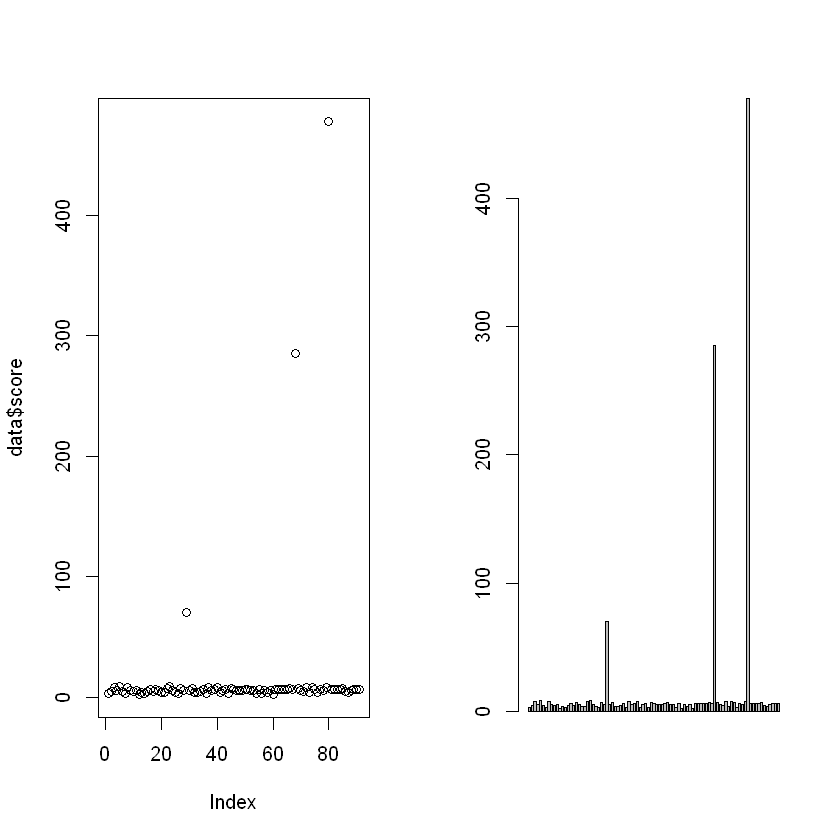

In [38]:
# outlier도 제거해주어야 하기 outlier 체크해보자
par(mfrow = c(1,2)) # 행,열
plot(data$score) # 산점도 이용 outlier 확인 (50이상 발견)
barplot(data$score) # 막대 차트 이용 outlier 확인 (50이상 발견)
mean(data$score)

In [39]:
# 데이터 정제, outlier 제거 (평균이상인 것들은 제거해버리자)
length(data$score)

[1] 91

In [41]:
data2 = subset(data,score<=14)
length(data2$score)

[1] 88

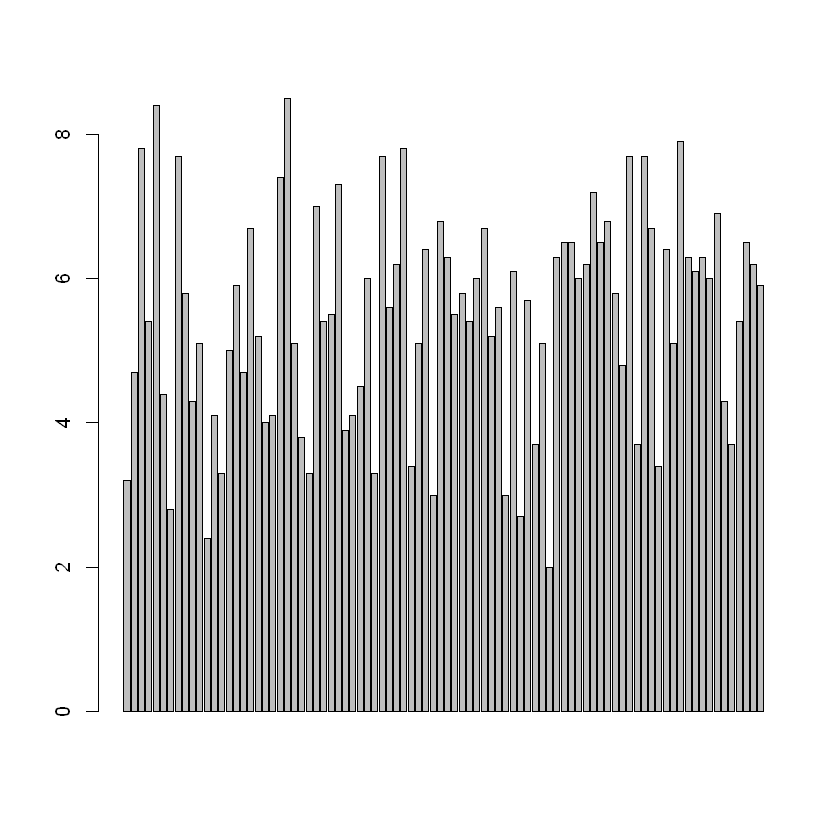

In [44]:
# 정제된 데이터 확인
x = data2$score
par(mfrow = c(1,1)) # 행,열
barplot(x)

- 세 집단 subset 작성과 기술통계량

In [46]:
# 세 집단 subset 작성
data2$method2[data2$method == 1] = '방법1'
data2$method2[data2$method == 2] = '방법2'
data2$method2[data2$method == 3] = '방법3'

In [47]:
table(data2$method2)


방법1 방법2 방법3 
   31    27    30 

In [48]:
x = table(data2$method2)

In [49]:
# 교육 방법에 따른 시험성적 평균 구하기
y = tapply(data2$score,data2$method2,mean)
y

방법1    방법2    방법3 
4.187097 6.800000 5.610000

In [50]:
# 교육 방법과  시험 성적으로 데이터프레임 생성
df = data.frame(교육방법 = x, 성적 = y)
df

,교육방법.Var1,교육방법.Freq,성적
,<fct>,<int>,<dbl>
방법1,방법1,31,4.187097
방법2,방법2,27,6.800000
방법3,방법3,30,5.610000


- 세 집단 간의 동질성 검정
  - 분산분석의 동질성 검정은 bartlett.test() 함수를 이용한다. 
  - 검정결과가 유의수준보다 큰 경우 귀무가설(세 집단 간 분포의 모양이 차이가 없다)을 채택한다. 

In [52]:
head(data2,3)

,method,score,method2
,<int>,<dbl>,<chr>
1,1,3.2,방법1
3,3,4.7,방법3
5,2,7.8,방법2


In [56]:
bartlett.test(score~method, data= data2) # 종속변수~독립변수 


	Bartlett test of homogeneity of variances

data:  score by method
Bartlett's K-squared = 3.3157, df = 2, p-value = 0.1905


- 귀무가설을 채택한다. 즉, 세 집단 간의 분포 형태가 동질하다고 할 수 있다. 

- 분산분석
  - 세 집단 간의 동질성 검정에서 분포 형태가 동질하다고 분석되었기 때문에 aov() 함수를 이용하여 세 집단 간 평균 차이 검정을 수행한다. 만약 동질하지 않은 경우 kruskal.test() 함수를 이용하여 비모수 검정을 수행한다.

In [59]:
result = aov(score~method2, data =data2)
result 

Call:
   aov(formula = score ~ method2, data = data2)

Terms:
                 method2 Residuals
Sum of Squares  99.36805  96.90184
Deg. of Freedom        2        85

Residual standard error: 1.067718
Estimated effects may be unbalanced

- aov()의 결과값은 summary() 함수를 사용해야 p-value 확인 가능

In [62]:
summary(result)

            Df Sum Sq Mean Sq F value   Pr(>F)    
method2      2  99.37   49.68   43.58 9.39e-14 ***
Residuals   85  96.90    1.14                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- 검정 통계량 p-value 값은 9.39e-14로 유의수준보다 매우 작기 때문에 귀무 가설 기각. 즉, 세 가지 교육 방법 간의 평균에 차이가 있다고 볼 수 있다. 

- 분산분석의 결과를 대상으로 집단별로 평균의 차에 대한 비교를 통해서 사후검정을 수행할 수 있다. 

In [64]:
# 분산분석 결과에 대한 사후검정
TukeyHSD(result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = score ~ method2, data = data2)

$method2
                 diff        lwr        upr     p adj
방법2-방법1  2.612903  1.9424342  3.2833723 0.0000000
방법3-방법1  1.422903  0.7705979  2.0752085 0.0000040
방법3-방법2 -1.190000 -1.8656509 -0.5143491 0.0001911


- diff : 집단 간 평균 차이의 크기
- lwr,upr : 신뢰구간의 하한값과 상한값.
- 이때 신뢰구간에 0이 포함되면 차이가 통계적으로 유의하지 않다. 즉 집단 간의 평균 차이가 없다고 볼 수 있따는 것이다. 따라서 지금 이 상황에선 유의미한 수준에서 세 집단 간 분산의 차이가 있다고 볼 수 있다. 

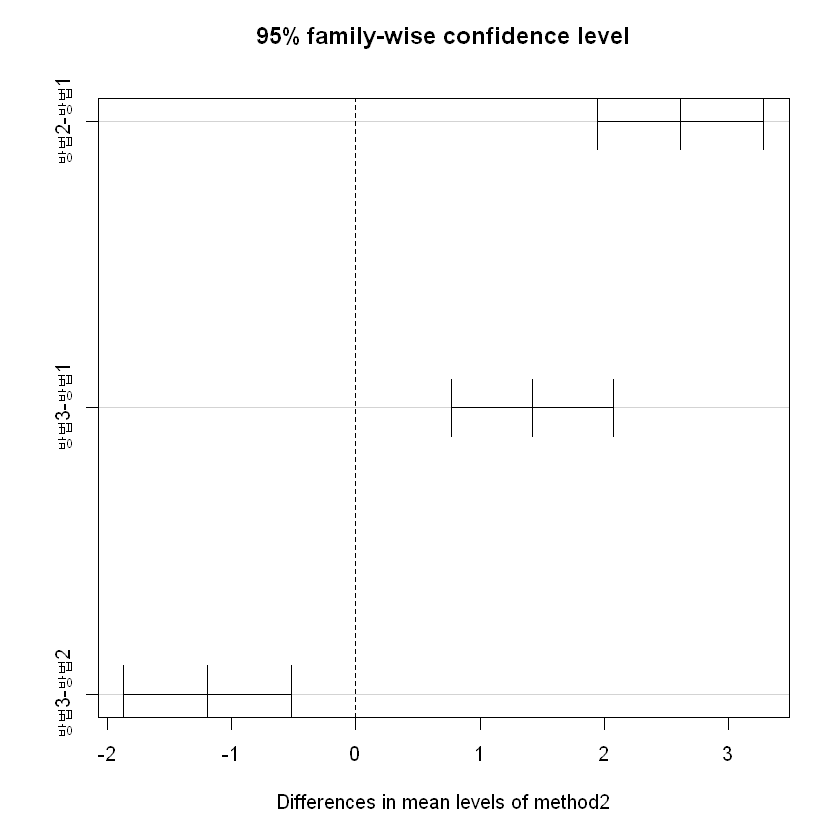

In [67]:
# 사후검정 시각화
plot(TukeyHSD(result))

- 분산분석에서 3가지 교육방법에 따른 실기시험의 평균에 차이가 있다라는 결론을 내렸다면, 분산분석의 사후검정은 구체적으로 어떤 교육 방법 간에 차이가 있는지를 보여주는 부분이다.
- 여기서 방법2와 방법1의 집단 간 평균의 차(diff)가 가장 큰것으로 나타났다. 